In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
def string_to_list(s):
    if pd.isna(s):
        return set()
    else:
        return sorted(list(set(s.split(','))))
    
def concatenate_elements(lst):
    return ','.join(lst)

In [3]:
df = pd.read_csv("../sandbox/PyR0_Ranked_Strains.tsv", sep="\t")
df['mutations'] = df['mutations'].apply(string_to_list)
df['mutations'] = df['mutations'].apply(concatenate_elements)
df["group"] = df['strain'].apply(lambda x: x[0] if x else None)

df.rename(columns={"Run date": "Run_Date"},
            inplace=True)
df["Run_Date"] = pd.to_datetime(df["Run_Date"])

df.head()

,rank,strain,mean/stddev,log10(P(R > R_A)),R / R_A,R / R_A 95% ci lower,R / R_A 95% ci upper,confirmed cases / day,confirmed cases total,birthday,mutations,Run_Date,group
0,1,BL.1,596.953,77384.2,25.0913,24.8433,25.3417,2147.280,1092790.0,2022-07-27,"E:T11A,E:T9I,M:A63T,M:Q19E,N:G204R,N:P13L,N:R2...",2021-03-12,B
1,2,BA.2.75.2,473.660,48720.8,24.5101,24.2076,24.8165,2239.940,407967.0,2022-08-01,"E:T11A,E:T9I,M:A63T,M:Q19E,N:G204R,N:P13L,N:R2...",2021-03-12,B
2,3,BM.1.1,578.119,72578.5,24.4992,24.2512,24.7498,1238.050,344115.0,2022-07-30,"E:T11A,E:T9I,M:A63T,M:Q19E,N:G204R,N:P13L,N:R2...",2021-03-12,B
3,4,BM.2,774.440,130239.0,24.4910,24.3057,24.6777,351.821,301815.0,2022-07-19,"E:T11A,E:T9I,M:A63T,M:Q19E,N:G204R,N:P13L,N:R2...",2021-03-12,B
4,5,BN.1,780.754,132371.0,24.4909,24.3071,24.6761,687.727,312352.0,2022-08-11,"E:T11A,E:T9I,M:A63T,M:Q19E,N:G204R,N:P13L,N:R2...",2021-03-12,B


In [4]:
sorted(df[df["strain"].str.startswith("J")]["strain"].unique())

['JA.1',
 'JB.1',
 'JB.1.1',
 'JB.2',
 'JB.2.1',
 'JC.1',
 'JC.2',
 'JC.3',
 'JC.4',
 'JC.5',
 'JC.5.1',
 'JC.6',
 'JD.1',
 'JD.1.1',
 'JD.1.1.1',
 'JD.1.1.2',
 'JD.1.1.3',
 'JD.1.1.4',
 'JD.1.1.5',
 'JD.1.1.6',
 'JD.1.1.7',
 'JD.1.1.8',
 'JD.1.2',
 'JD.1.2.1',
 'JD.1.2.2',
 'JD.2',
 'JD.2.1',
 'JE.1',
 'JE.1.1',
 'JE.1.1.1',
 'JF.1',
 'JF.1.1',
 'JF.1.1.1',
 'JF.1.1.2',
 'JF.2',
 'JF.3',
 'JF.4',
 'JG.1',
 'JG.2',
 'JG.3',
 'JG.3.1',
 'JG.3.2',
 'JG.3.3',
 'JG.3.4',
 'JG.4',
 'JH.1',
 'JH.2',
 'JJ.1',
 'JK.1',
 'JL.1',
 'JM.1',
 'JM.2',
 'JN.1',
 'JN.1.1',
 'JN.1.1.1',
 'JN.1.1.2',
 'JN.1.1.3',
 'JN.1.1.4',
 'JN.1.1.5',
 'JN.1.10',
 'JN.1.11',
 'JN.1.11.1',
 'JN.1.12',
 'JN.1.13',
 'JN.1.13.1',
 'JN.1.14',
 'JN.1.15',
 'JN.1.16',
 'JN.1.17',
 'JN.1.18',
 'JN.1.19',
 'JN.1.2',
 'JN.1.2.1',
 'JN.1.20',
 'JN.1.21',
 'JN.1.22',
 'JN.1.23',
 'JN.1.24',
 'JN.1.25',
 'JN.1.25.1',
 'JN.1.3',
 'JN.1.4',
 'JN.1.4.1',
 'JN.1.4.2',
 'JN.1.4.3',
 'JN.1.5',
 'JN.1.6',
 'JN.1.6.1',
 'JN.1.7',
 'JN.1

In [5]:
mutations_list = df[["strain", "mutations"]][(df["mutations"]!="")].drop_duplicates(keep="first").sort_values(by="strain")
mutations_list["mutations"] = df["mutations"].apply(string_to_list)
mutations_dict = dict(zip(mutations_list["strain"], mutations_list["mutations"]))

for key, value in mutations_dict.items():
    # Remove the stuff before the colon and the colon for each value in the list
    mutations_dict[key] = [entry.split(':')[1] for entry in value]
    
ba287 = ["H69del", "R190S", "L24del", "S373P", "N969K", "H655Y", "Q954H", "D138del", "L18del", "N501Y", "P25del", "N460K", "F140del",
         "H146del", "G75D", "V143del", "T19del", "G142del", "Q23del", "V126A", "R408S", "D936G", "P621S", "S375F", "Q498R", "T20del",
         "V642G", "E484A", "P26del", "T791I", "Y145del", "D614G", "V213G", "A27S", "S98F", "N440K", "V16del", "N17del", "D796H", "N679R",
         "T22del", "Y505H", "C15del", "R21del", "N481K", "S371F", "T376A", "K417T", "G339D", "V445G", "P681H", "Y144del", "D405N", "L452M",
         "D215G", "N137del", "S477N", "C136del", "K444N", "V70del", "W152L", "P139del", "L141del", "S691P", "N764K", "R634H", "F157L"]

for key, value in mutations_dict.items():
    # Find mutations that intersect with variant_ba_mutations
    intersection_mutations = [mutation for mutation in value if mutation in ba287]
    # Count the number of mutations in the intersection
    intersect_count = len(intersection_mutations)
    # Add the intersection mutations to the dictionary value
    mutations_dict[key] = {'mutations': value, 'intersection_count': intersect_count, 'intersection_mutations': intersection_mutations}

strains_with_intersection = {key: value for key, value in mutations_dict.items() if key in ["BA.2", "BA.2.86", "JN.1", "HV.1", "HK.3", "XBB.1"]}

strains_with_intersection_sorted = dict(sorted(strains_with_intersection.items(), key=lambda x: x[1]['intersection_count'], reverse=True))

In [6]:
strains_with_intersection_sorted_df = pd.DataFrame.from_dict(strains_with_intersection_sorted, orient='index')

strains_with_intersection_sorted_df.to_excel('../results/ba287_intersections.xlsx', index=True)


mutations = set(m for sublist in strains_with_intersection_sorted_df['intersection_mutations'] for m in sublist)

# Create a column for each mutation
for mutation in mutations:
    strains_with_intersection_sorted_df[mutation] = strains_with_intersection_sorted_df['intersection_mutations'].apply(lambda x: 1 if mutation in x else 0)

# Drop the original 'Mutations' column
strains_with_intersection_sorted_df.drop(columns=['mutations', 'intersection_count', 'intersection_mutations'], inplace=True)

strains_with_intersection_sorted_df


,G339D,N440K,N481K,Q954H,D405N,P681H,V213G,H655Y,P621S,S477N,...,S371F,S375F,E484A,F157L,N764K,T376A,R408S,D614G,S373P,Y505H
BA.2,1,1,0,1,1,1,1,1,0,1,...,1,1,1,0,1,1,1,1,1,1
BA.2.86,0,1,1,1,1,0,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
HV.1,0,1,0,1,1,1,0,1,0,1,...,1,1,1,1,1,1,1,1,1,1
JN.1,0,1,1,1,1,0,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
HK.3,0,1,0,1,1,1,0,1,0,1,...,1,1,1,0,1,1,1,1,1,1
XBB.1,0,1,0,1,1,1,0,1,0,1,...,1,1,1,0,1,1,1,1,1,1


Text(0.5, 1.0, 'Presence of BA.2.87 Mutations in Existing Variants')

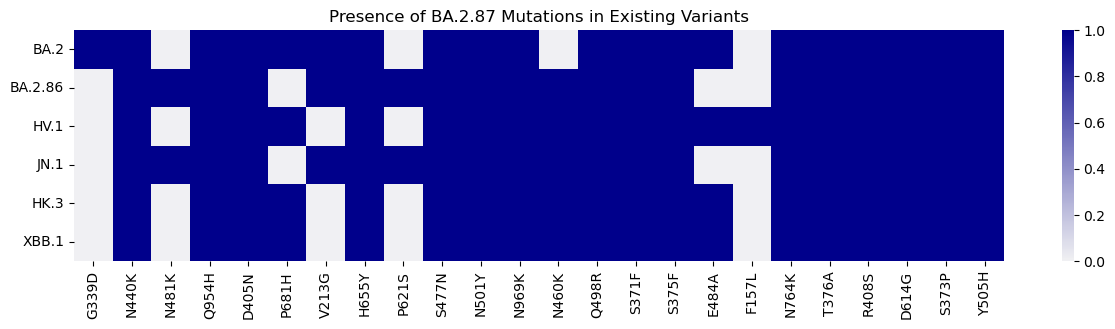

In [7]:
fig, ax = plt.subplots(figsize=(15,3))

sns.heatmap(strains_with_intersection_sorted_df,
            cmap=sns.light_palette("darkblue", as_cmap=True),
            ax=ax)

ax.set_title("Presence of BA.2.87 Mutations in Existing Variants")

In [8]:
strain_biology = df[["strain", "group", "mutations"]][(df["mutations"]!="")].drop_duplicates(keep="first").sort_values(by="strain")

unique_mutations = sorted(list(set(','.join(df['mutations'].dropna()).split(','))))
unique_mutations.remove("")

for mutation in unique_mutations:
    strain_biology[mutation] = strain_biology['mutations'].apply(lambda x: 1 if mutation in str(x) else 0)

# Drop the original "mutations" column if needed
strain_biology = strain_biology.drop(['mutations'], axis=1)

strain_biology = strain_biology.set_index("strain")
# Display the updated DataFrame
strain_biology.head()

/var/folders/47/14w93qyx7xj7xrsd5bd9sfqr0000gp/T/ipykernel_78872/3653137785.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strain_biology[mutation] = strain_biology['mutations'].apply(lambda x: 1 if mutation in str(x) else 0)
/var/folders/47/14w93qyx7xj7xrsd5bd9sfqr0000gp/T/ipykernel_78872/3653137785.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strain_biology[mutation] = strain_biology['mutations'].apply(lambda x: 1 if mutation in str(x) else 0)
/var/folders/47/14w93qyx7xj7xrsd5bd9sfqr0000gp/T/ipykernel_78872/3653137

,group,E:D72G,E:E8D,E:F20L,E:F23V,E:F26L,E:L18I,E:L21F,E:L21I,E:L51I,...,S:Y248D,S:Y248H,S:Y248N,S:Y248S,S:Y28H,S:Y449H,S:Y449N,S:Y451H,S:Y453F,S:Y505H
strain,,,,,,,,,,,,,,,,,,,,,
A,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.1,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.11,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.12,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.15,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
group = strain_biology["group"]
lut = dict(zip(group.unique(),sns.color_palette("hls",len(group.unique())).as_hex()))
row_colors = group.map(lut)

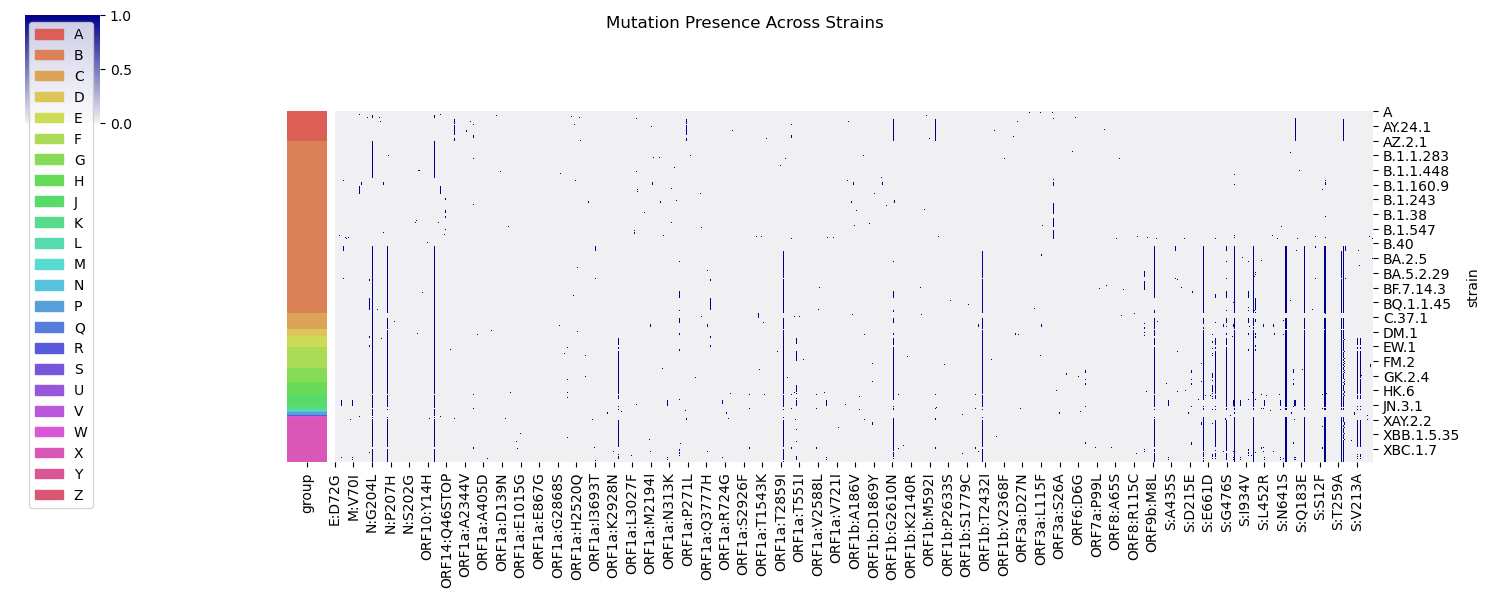

In [10]:
sns.clustermap(strain_biology[unique_mutations],
            row_colors=row_colors,
            row_cluster=False,
            col_cluster=False,
           cmap=sns.light_palette("darkblue", as_cmap=True),
           figsize=(15,6),
           ).fig.suptitle("Mutation Presence Across Strains")

patchList = []
for key in lut:
        data_key = mpatches.Patch(color=lut[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)

Something is broken with case counts here...

In [11]:
df["confirmed_cases_total_group"] = df.groupby(["Run_Date", "group"])["confirmed cases total"].transform("sum")
df

,rank,strain,mean/stddev,log10(P(R > R_A)),R / R_A,R / R_A 95% ci lower,R / R_A 95% ci upper,confirmed cases / day,confirmed cases total,birthday,mutations,Run_Date,group,confirmed_cases_total_group
0,1,BL.1,596.9530,77384.2000,25.091300,24.843300,25.341700,2147.280,1092790.0,2022-07-27,"E:T11A,E:T9I,M:A63T,M:Q19E,N:G204R,N:P13L,N:R2...",2021-03-12,B,7.574687e+09
1,2,BA.2.75.2,473.6600,48720.8000,24.510100,24.207600,24.816500,2239.940,407967.0,2022-08-01,"E:T11A,E:T9I,M:A63T,M:Q19E,N:G204R,N:P13L,N:R2...",2021-03-12,B,7.574687e+09
2,3,BM.1.1,578.1190,72578.5000,24.499200,24.251200,24.749800,1238.050,344115.0,2022-07-30,"E:T11A,E:T9I,M:A63T,M:Q19E,N:G204R,N:P13L,N:R2...",2021-03-12,B,7.574687e+09
3,4,BM.2,774.4400,130239.0000,24.491000,24.305700,24.677700,351.821,301815.0,2022-07-19,"E:T11A,E:T9I,M:A63T,M:Q19E,N:G204R,N:P13L,N:R2...",2021-03-12,B,7.574687e+09
4,5,BN.1,780.7540,132371.0000,24.490900,24.307100,24.676100,687.727,312352.0,2022-08-11,"E:T11A,E:T9I,M:A63T,M:Q19E,N:G204R,N:P13L,N:R2...",2021-03-12,B,7.574687e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250044,3776,B.41,-96.0390,-2005.2400,0.918785,0.915957,0.921621,0.000,10494.2,2020-02-19,"ORF1a:M1769I,ORF3a:G251V",2024-03-04,B,1.083101e+10
250045,3777,A.1,-20.8621,-96.2278,0.910170,0.896552,0.923995,0.000,78410.3,2020-02-24,"ORF1b:P1427L,ORF1b:Y1464C,ORF8:L84S",2024-03-04,A,2.629314e+09
250046,3778,B.61,-72.0179,-1128.5100,0.886479,0.881983,0.890998,0.000,45931.5,2020-03-05,"ORF1a:P765S,ORF3a:G251V",2024-03-04,B,1.083101e+10
250047,3779,B.60,-140.1840,-4269.8300,0.865813,0.863269,0.868364,0.000,181384.0,2020-03-23,"ORF1a:A2249V,ORF1a:I739V,ORF1a:P765S,ORF3a:G251V",2024-03-04,B,1.083101e+10


<Axes: xlabel='Run_Date', ylabel='confirmed_cases_total_group'>

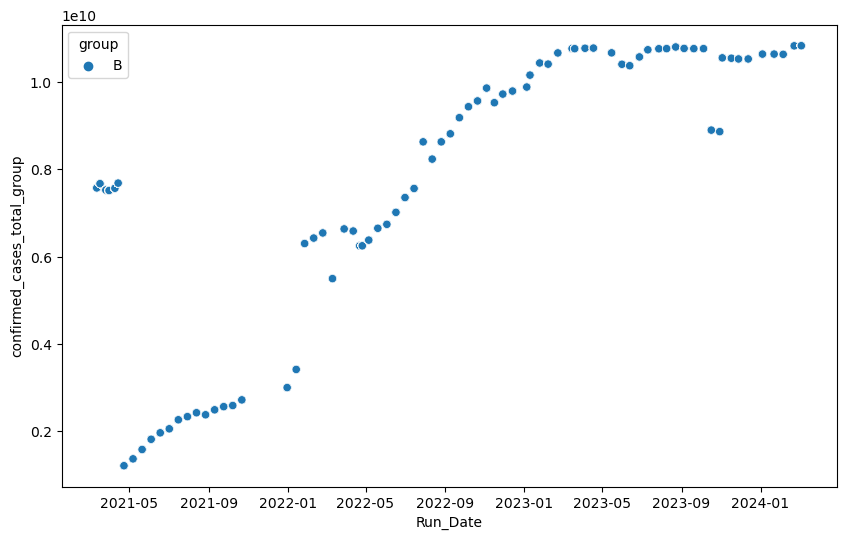

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df[df["group"]=="B"],
                x="Run_Date",
                y="confirmed_cases_total_group",
                hue="group",
                legend=True)